In [1]:
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install scanpy

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import shortest_path as sp
import sc_pca
import random
import check_coords


In [3]:
dir = "/Users/ozgun/Data/Josh/"
data_file = dir + "normalized_mat.tsv"
data_file_denoised = dir + "normalized_denoised_mat.tsv"
pca_pre_file = dir + "pca_coords_8.tsv"
pca_file = dir + "pca_8.tsv"
dist_euc_file = dir + "dist_euclidean.tsv"
dist_cos_file = dir + "dist_cosine.tsv"
dist_um_file = dir + "dist_umap.tsv"
diffexp_file = dir + "diffexp_cosine.tsv"

In [27]:

#sc_pca.sc_pca(data_file, pca_file, 10)
sp.write_distance_matrix(pca_file, dist_euc_file)
sp.write_cosine_distance_matrix(pca_file, dist_cos_file)
sp.write_distance_matrix(dir + "umap_coords_transposed.tsv", dist_um_file)

In [3]:
traj, time = sp.get_traj_and_time(dir + "dist_umap.tsv", "tumor_ATCGAGTCAAGCTGGA-1", "tumor_TCAGGTATCAATAAGG-1")

print(traj)
check_coords.check_coords(traj, dir + "umap_coords.tsv")


#sp.write_changes(data_file_denoised, traj, time, diffexp_file)

['tumor_ATCGAGTCAAGCTGGA-1', 'tumor_TTCTCAACACCAGATT-1', 'tumor_CCTACACCACAGACTT-1', 'tumor_CTCGAGGCACACCGAC-1', 'tumor_TCTATTGGTAAACACA-1', 'tumor_CACAGGCTCAATCACG-1', 'tumor_CTCTGGTTCCGAAGAG-1', 'tumor_ATTGGACCAAGAAGAG-1', 'tumor_CCCAGTTTCCCATTAT-1', 'tumor_CTGGTCTAGCTGCCCA-1', 'tumor_GTGCAGCGTTGAGTTC-1', 'tumor_CTCGAGGCAGGATTGG-1', 'tumor_CGACTTCAGCTCTCGG-1', 'tumor_ATCCACCTCTGTCCGT-1', 'tumor_ACGCAGCTCAGGCAAG-1', 'tumor_AGCCTAAAGCTAGTGG-1', 'tumor_GTGCTTCTCTTGTCAT-1', 'tumor_AGATCTGCATCGATTG-1', 'tumor_TTCTCAACACACGCTG-1', 'tumor_TCAGGTATCTCGTTTA-1', 'tumor_TGGTTCCGTTCTGTTT-1', 'tumor_ACACTGAGTTCGCGAC-1', 'tumor_AGCGGTCAGTGGTAGC-1', 'tumor_GAAGCAGAGCGATAGC-1', 'tumor_TACAGTGAGGTGATTA-1', 'midpoint_AGAGCTTGTGTTGAGG-1', 'tumor_TTCTCAACAGACACTT-1', 'tumor_GCGGGTTTCGTGGGAA-1', 'tumor_CTACCCAAGGAGTTTA-1', 'tumor_TTGAACGGTAGGCTGA-1', 'tumor_ACAGCTACACTGCCAG-1', 'tumor_GGGCATCCAACTGCGC-1', 'tumor_CCCATACCAGGTGGAT-1', 'tumor_CGATCGGCAGGAACGT-1', 'tumor_ACTGATGTCACTTCAT-1', 'tumor_TTAGGCATC

,UMAP_1,UMAP_2
cell_ID,,
tumor_ATCGAGTCAAGCTGGA-1,-11.791385,1.255611
tumor_TTCTCAACACCAGATT-1,-11.830850,1.337023
tumor_CCTACACCACAGACTT-1,-11.850818,1.390959
tumor_CTCGAGGCACACCGAC-1,-11.794748,1.520846
tumor_TCTATTGGTAAACACA-1,-11.849222,1.633338
...,...,...
tumor_GACGGCTCAATGAAAC-1,-6.022050,3.978444
tumor_TCACAAGAGGGTATCG-1,-5.991089,4.012311
tumor_CGTTGGGTCCTAGAAC-1,-5.893780,4.065837


In [25]:
sp.transpose_table(pca_pre_file, pca_file)

In [18]:
sp.k_rank_svd(data_file, 50, data_file_denoised)

In [18]:
centers = pd.read_table(dir + "cell_selections.txt")
centers.iloc[1][1]

'midpoint_TCTGGAAGTGTAAGTA-1'

In [11]:
centers.iloc[1]

array(['midpoint_TCTGGAAGTGTAAGTA-1',
       '[-1.77192308229959, 10.0623317198924]'], dtype=object)

In [ ]:
centers = pd.read_table(dir + "cell_selections_subset.txt")

for i in range(6):
    for j in range(6):
        if not i == j:
            source = centers.iloc[i][1]
            sInd = centers.iloc[i][0]
            target = centers.iloc[j][1]
            tInd = centers.iloc[j][0]
            traj, time = sp.get_traj_and_time(dist_um_file, source, target)
            sp.write_changes(data_file_denoised, traj, time, dir + "/diffexp/" + str(sInd) + "-to-" + str(tInd) + ".tsv")

                               UMAP_1    UMAP_2
cell_ID                                        
midpoint_TGTTCCGGTTCCACAA-1  1.651167  1.689483
midpoint_ACGGGTCGTCACACGC-1  1.576401  1.665109
midpoint_AACCGCGAGGAGTAGA-1  1.415012  1.693049
midpoint_ATGTGTGTCACATACG-1  1.189865  1.688993
midpoint_TCTCTAAAGGGTTCCC-1  1.065879  1.598922
midpoint_ATCCGAACAACCGCCA-1  0.954536  1.689437
midpoint_AGGTCCGGTGTGCGTC-1  0.873443  1.898942
midpoint_GAACGGAGTAAGTAGT-1  0.857163  2.002279
midpoint_GGATGTTCAATAGAGT-1  0.763485  2.049155
midpoint_GACGTGCAGTCCAGGA-1  0.691674  2.113551
midpoint_GTGCATACACAAGACG-1  0.677241  2.128279
midpoint_GACTGCGGTCCATCCT-1  0.627398  2.177471
midpoint_GGAATAAAGAAGGGTA-1  0.575962  2.158805
midpoint_GCATGATCATTGGTAC-1  0.397969  2.203540
midpoint_AAGTCTGTCCTCATTA-1  0.352708  2.242986
midpoint_ACGGCCACAGGCGATA-1  0.270832  2.261862
midpoint_CAACTAGGTTCCACAA-1  0.270857  2.265971
midpoint_CCTTCGACACGGTTTA-1  0.174737  2.280179
midpoint_TTTGCGCGTAAGAGAG-1  0.151970  2

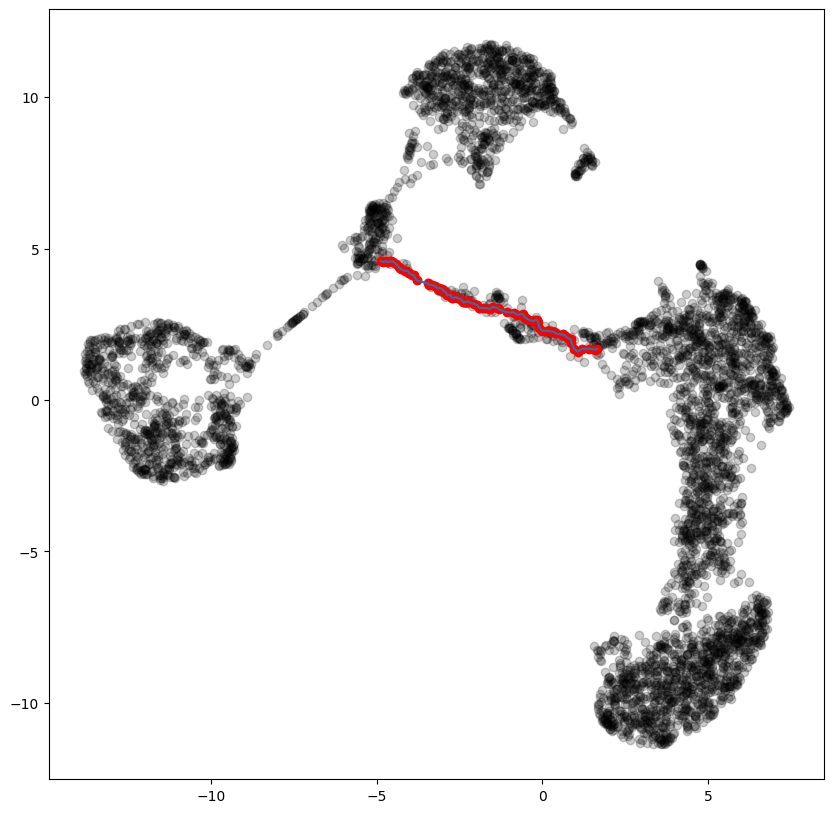

In [29]:

table = pd.read_table(dir + "umap_coords_transposed.tsv", index_col=0)
mat = table.to_numpy()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(mat[0], mat[1], color = 'k', alpha=0.2)

# traj, time = sp.get_traj_and_time(dir + "dist_umap.tsv", "tumor_TCAGGTATCAATAAGG-1", "tumor_CTACCCAAGGAGTTTA-1") # 6 to 4 bridge
# traj, time = sp.get_traj_and_time(dir + "dist_umap.tsv", "tumor_AGGGATGCAATTCCTT-1", "tumor_TTAACTCCAGGACCCT-1") # 1 to 6 bridge
traj, time = sp.get_traj_and_time(dir + "dist_umap.tsv", "midpoint_TGTTCCGGTTCCACAA-1", "tumor_GTATTCTAGCACAGGT-1") # 8 to 6 bridge

# traj, time = sp.get_traj_and_time(dir + "dist_cosine.tsv", "tumor_ATCGAGTCAAGCTGGA-1", "tumor_TCAGGTATCAATAAGG-1")

k = check_coords.check_coords(traj, dir + "umap_coords.tsv")
print(k.to_string())

line = check_coords.get_line_map(traj, dir + "umap_coords.tsv")

ax.plot(line[0], line[1])
ax.scatter(line[0], line[1], color = 'r', alpha=1)

sp.write_changes(data_file_denoised, traj, time, dir + "/diffexp/8-to-6.tsv")

plt.show()

In [20]:
cds = pd.read_table(dir + "umap_coords.tsv", index_col=0)
cds.loc["midpoint_AAACCTGCACCCAGTG-1"]


UMAP_1   -1.711545
UMAP_2    8.570790
Name: midpoint_AAACCTGCACCCAGTG-1, dtype: float64